<a href="https://colab.research.google.com/github/asanam767/CODSOFT/blob/main/Credit_Card_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME - Katta Manasa Machine Learning INTERNSHIP @ CODSOFT TASK 2**

**PROJECT NAME - Credit Card Fraud Detection**

**GITHUB LINK**: [https://github.com/asanam767/CODSOFT](https://github.com/asanam767/CODSOFT)

---

**Problem Statement:**

Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,or Random Forests to classify transactions as fraudulent or legitimate.

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kattamanasa","key":"aa6fcd1961c73a89aefbe88e87cead6d"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [8]:
# loading the datasets
train_data=pd.read_csv('/content/fraudTrain.csv')


In [13]:
test_data = pd.read_csv('/content/fraudTest.csv', engine='python', skipfooter=1, on_bad_lines='skip')

In [14]:
# display data

train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [15]:
# display data

test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [16]:
# data details

test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [17]:
# data details

train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
# data details

train_data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [19]:
# data details

test_data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [20]:
# slicing data to drop invalid data

train_data=train_data.drop(columns='Unnamed: 0')
test_data=test_data.drop(columns='Unnamed: 0')

In [21]:
# encoding training data
encoder=LabelEncoder()
train_data['merchant']=encoder.fit_transform(train_data['merchant'])
train_data['category']=encoder.fit_transform(train_data['category'])
train_data['street']=encoder.fit_transform(train_data['street'])
train_data['job']=encoder.fit_transform(train_data['job'])
train_data['trans_num']=encoder.fit_transform(train_data['trans_num'])
train_data['first']=encoder.fit_transform(train_data['first'])
train_data['city']=encoder.fit_transform(train_data['city'])
train_data['state']=encoder.fit_transform(train_data['state'])
train_data['last']=encoder.fit_transform(train_data['last'])
train_data['gender']=encoder.fit_transform(train_data['gender'])
train_data['trans_date_trans_time']=encoder.fit_transform(train_data['trans_date_trans_time'])
train_data['dob']=encoder.fit_transform(train_data['dob'])

# encoding test data

test_data['merchant']=encoder.fit_transform(test_data['merchant'])
test_data['category']=encoder.fit_transform(test_data['category'])
test_data['street']=encoder.fit_transform(test_data['street'])
test_data['job']=encoder.fit_transform(test_data['job'])
test_data['trans_num']=encoder.fit_transform(test_data['trans_num'])
test_data['first']=encoder.fit_transform(test_data['first'])
test_data['city']=encoder.fit_transform(test_data['city'])
test_data['state']=encoder.fit_transform(test_data['state'])
test_data['last']=encoder.fit_transform(test_data['last'])
test_data['gender']=encoder.fit_transform(test_data['gender'])
test_data['trans_date_trans_time']=encoder.fit_transform(test_data['trans_date_trans_time'])
test_data['dob']=encoder.fit_transform(test_data['dob'])

In [22]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,152,18,0,527,493,...,36.0788,-81.1781,3495,356,720,1047,1325376018,36.011293,-82.048315,0.0
1,1,630423337322,241,4,107.23,295,154,0,408,568,...,48.8878,-118.2105,149,411,548,2847,1325376044,49.159047,-118.186462,0.0
2,2,38859492057661,390,0,220.11,105,372,1,560,439,...,42.1808,-112.2620,4154,294,263,14810,1325376051,43.150704,-112.154481,0.0
3,3,3534093764340240,360,2,45.00,153,447,1,860,81,...,46.2306,-112.1138,1939,315,343,9877,1325376076,47.034331,-112.561071,0.0
4,4,375534208663984,297,9,41.96,321,146,1,393,203,...,38.4207,-79.4629,99,110,675,15046,1325376186,38.674999,-78.632459,0.0


In [23]:
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,319,10,2.86,149,113,1,338,157,...,33.9659,-80.9355,333497,274,368,4132,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,591,10,29.84,161,452,0,351,16,...,40.3207,-110.4360,302,390,749,4558,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,611,5,41.28,24,246,0,851,61,...,40.6729,-73.5365,34496,258,410,18229,1371816893,40.495810,-74.196111,0
3,3,3591919803438423,222,9,60.05,42,452,1,317,753,...,28.5697,-80.8191,54767,405,707,3006,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,292,13,3.19,245,258,1,541,246,...,44.2529,-85.0170,1126,195,174,7997,1371816917,44.959148,-85.884734,0


In [24]:
train_data.shape ,test_data.shape

((23367, 22), (23348, 22))

In [25]:
train_data.columns , test_data.columns

(Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
        'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
        'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
        'merch_long', 'is_fraud'],
       dtype='object'),
 Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
        'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
        'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
        'merch_long', 'is_fraud'],
       dtype='object'))

In [29]:
# splitting data

x_train = train_data.drop(columns='is_fraud')
y_train = train_data['is_fraud']
x_test = test_data.drop(columns='is_fraud')
y_test = test_data['is_fraud']

mode_y_train = y_train.mode()[0]
y_train.fillna(mode_y_train, inplace=True)

mode_y_test = y_test.mode()[0]
y_test.fillna(mode_y_test, inplace=True)


In [30]:
# build classification models

modelLR=LogisticRegression()
modelRF=RandomForestClassifier()
modelDT=DecisionTreeClassifier()

In [31]:
modelLR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
modelRF.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
modelDT.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
predictionsLR=modelLR.predict(x_test)
predictionsRF=modelRF.predict(x_test)
predictionsDT=modelDT.predict(x_test)

In [35]:
# make evaluations

cmLR=confusion_matrix(y_test,predictionsLR)
cmRF=confusion_matrix(y_test,predictionsRF)
cmDT=confusion_matrix(y_test,predictionsRF)

<Axes: >

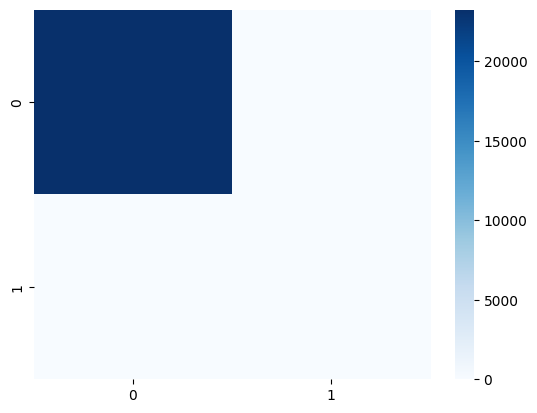

In [36]:

sns.heatmap(data=cmRF,cmap='Blues')

In [37]:
test_data['is_fraud'].value_counts()

,count
is_fraud,
0,23266
1,82


In [38]:
# get models accuracy

accuracyLR=accuracy_score(y_test,predictionsLR)
accuracyRF=accuracy_score(y_test,predictionsRF)
accuracyDT=accuracy_score(y_test,predictionsDT)

In [39]:
accuracyLR , accuracyRF , accuracyDT

(0.9964879218776769, 0.9957598081206099, 0.9925047113243104)